In [1]:
import pandas as pd
import numpy as np

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sb
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

/Users/marklam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/marklam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# read the dataset
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
original_df = df.copy()

In [6]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

There is no null rows in the dataset. I will now carry out exploratory data analysis.

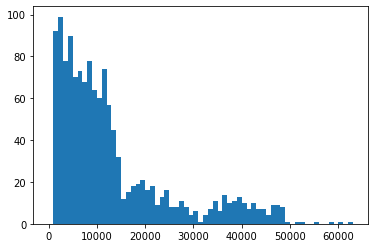

In [7]:
bins = np.arange(0, 64000, 1000)
plt.hist(data = df, x = 'charges', bins = bins);

In [8]:
np.log10(df['charges'].describe())

count    3.126456
mean     4.122885
std      4.083145
min      3.049944
25%      3.675805
50%      3.972297
75%      4.221151
max      4.804619
Name: charges, dtype: float64

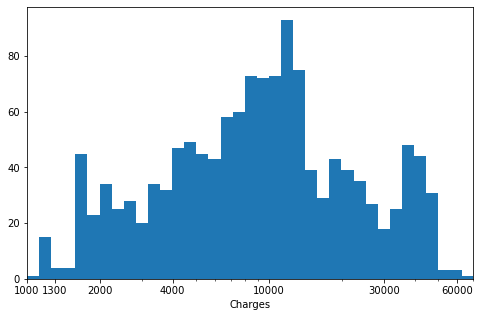

In [9]:
# from the above plot, we can see that charge is a right skewed distribution. Plot on logarithmic scale can normalise
# the data

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['charges'].max()) + log_binsize, log_binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'charges', bins = bins)
plt.xscale('log')
plt.xticks([1000, 1300, 2000, 4000, 10000, 30000, 60000], [1000, 1300, 2000, 4000, 10000, 30000, 60000])
plt.xlabel('Charges')
plt.xlim(1000,70000)
plt.show()

In [10]:
# to categorise age groups
df['age_category'] = df.apply(lambda x: 'young adult' if x['age'] <= 35 else 
                              ('senior adult' if x['age'] <= 55 else 'elder'), axis = 1)

In [11]:
# to create dummies for categorical variables, so we can analyse with different modules later
sex_dummies = pd.get_dummies(df['sex'])
smoker_dummies = pd.get_dummies(df['smoker'])
region_dummies = pd.get_dummies(df['region'])
age_category_dummies = pd.get_dummies(df['age_category'])
df1 = df.join(sex_dummies).join(smoker_dummies).join(region_dummies).join(age_category_dummies)

In [12]:
# to categorise weight groups
df['weight_status'] = df.apply(lambda x: 'underweight' if x['bmi'] <= 18.5 else 
                              ('normalweight' if x['bmi'] <= 24.9 else 
                              ('overweight' if x['bmi'] <= 29.9 else 'obese')), axis = 1)

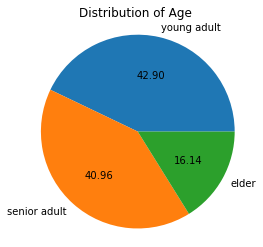

In [13]:
# Distribution of age group.
age_category = df['age_category'].value_counts()
plt.pie(age_category, labels = age_category.index, autopct='%.2f')
plt.title('Distribution of Age ')
plt.axis('square');

In [14]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

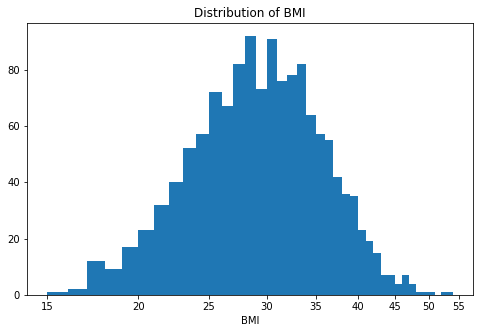

In [15]:
binsize = 1
bins = np.arange(15, 55, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'bmi', bins = bins)
plt.xscale('log')
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55], [15, 20, 25, 30, 35, 40, 45, 50, 55])
plt.xlabel('BMI')
plt.title('Distribution of BMI');

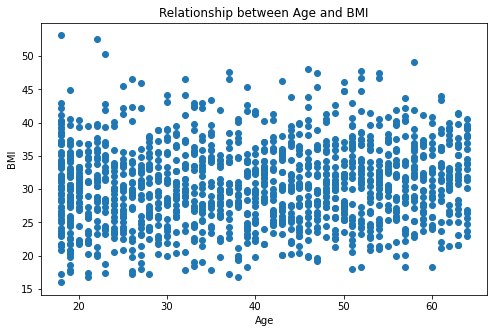

In [16]:
plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'age', y = 'bmi')
# plt.xlim([0, 5])
# plt.ylim([0, 100])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relationship between Age and BMI');

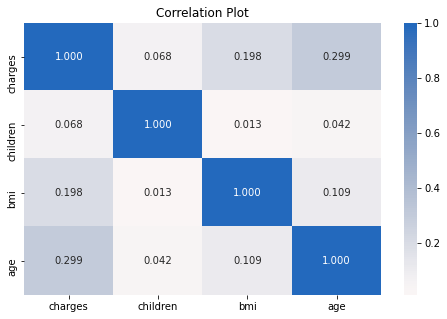

In [17]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[['charges','children','bmi','age']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot')
plt.show()

Let's look into the relationship between age and bmi

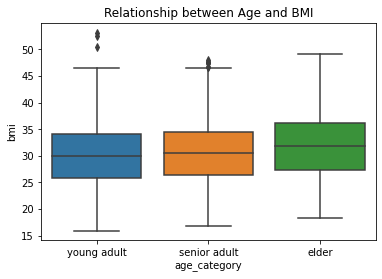

In [18]:
# box plot
ax = sb.boxplot(x = 'age_category', y ='bmi', data = df)
plt.title('Relationship between Age and BMI');

In [19]:
# regression model to see how age affects bmi

df['intercept'] = 1

lm = sm.OLS(df['bmi'], df[['intercept', 'age']])

results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.15
Date:                Wed, 18 May 2022   Prob (F-statistic):           6.19e-05
Time:                        13:51:37   Log-Likelihood:                -4309.1
No. Observations:                1338   AIC:                             8622.
Df Residuals:                    1336   BIC:                             8633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.8039      0.492     58.595      0.000      27.840      29.768
age            0.0474      0.012      4.018      0.000       0.024       0.071
==============================================================================
Omnibus:                       20.232   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.919
Skew:                           0.306   Prob(JB):                     2.87e-05
Kurtosis:                       2.987   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the p-value much lower than 0.05, it shows that age does have an impact on bmi with statistical evidence.

In [20]:
df.head()

age     sex     bmi  children smoker     region      charges age_category  \
0   19  female  27.900         0    yes  southwest  16884.92400  young adult   
1   18    male  33.770         1     no  southeast   1725.55230  young adult   
2   28    male  33.000         3     no  southeast   4449.46200  young adult   
3   33    male  22.705         0     no  northwest  21984.47061  young adult   
4   32    male  28.880         0     no  northwest   3866.85520  young adult   

  weight_status  intercept  
0    overweight          1  
1         obese          1  
2         obese          1  
3  normalweight          1  
4    overweight          1

In [21]:
# regression model of bmi and age category, using senior adult as base
df1['intercept'] = 1
lm = sm.OLS(df1['bmi'], df1[['intercept', 'young adult', 'elder']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00268
Time:                        13:51:37   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      30.8191      0.260    118.744      0.000      30.310      31.328
young adult    -0.7092      0.363     -1.954      0.051      -1.421       0.003
elder           0.9202      0.488      1.885      0.060      -0.037       1.878
==============================================================================
Omnibus:                       19.635   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.284
Skew:                           0.301   Prob(JB):                     3.94e-05
Kurtosis:                       2.981   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the p-value of young adult slightly above 0.05, and elder much lower than 0.05, it shows that age might not have a huge impact from 18 - 35 years old, but does have an impact for 55 years old or above.

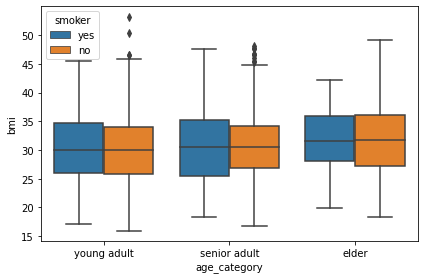

In [22]:
# box plot of relationship between bmi, smoking habit and age category
ax = sb.boxplot(x='age_category', y='bmi', hue='smoker', data=df)
plt.tight_layout()

# plt.legend(loc='upper right', labels=['Smoker', 'Non-smoker'])

In [23]:
mean_charge_young_adult = df.query('age_category == "young adult"')['charges'].mean()
print('mean charge of young adult: ', mean_charge_young_adult)

mean charge of young adult:  9744.478281339718


In [24]:
mean_charge_senior_adult = df.query('age_category == "senior adult"')['charges'].mean()
print('mean charge of senior adult: ', mean_charge_senior_adult)

mean charge of senior adult:  14785.693053029197


In [25]:
mean_charge_elder = df.query('age_category == "elder"')['charges'].mean()
print('mean charge of elder: ', mean_charge_elder)

mean charge of elder:  18795.993815787024


In [26]:
median_charge_young_adult = df.query('age_category == "young adult"')['charges'].median()
print('median charge of young adult: ', median_charge_young_adult)

median charge of young adult:  4252.167025


In [27]:
median_charge_senior_adult = df.query('age_category == "senior adult"')['charges'].median()
print('median charge of senior adult: ', median_charge_senior_adult)

median charge of senior adult:  9565.00995


In [28]:
median_charge_elder = df.query('age_category == "elder"')['charges'].median()
print('median charge of elder: ', median_charge_elder)

median charge of elder:  13429.6502


In [29]:
# dive into the relationship between age category and charges
y1 = [mean_charge_young_adult, mean_charge_senior_adult, mean_charge_elder]
y2 = [median_charge_young_adult, median_charge_senior_adult, median_charge_elder]
x = ['young adult', 'senior adult', 'elder']

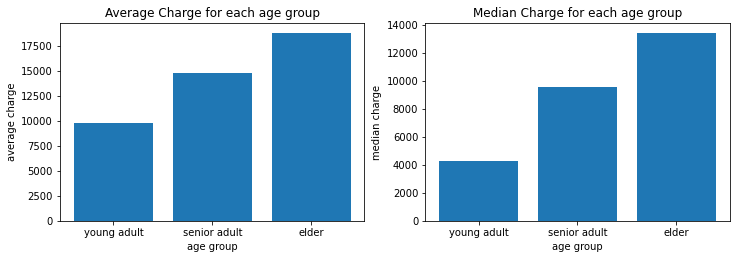

In [30]:
plt.figure(figsize = [12, 8])

plt.subplot(2, 2, 1)
plt.bar(x, y1)
plt.xlabel('age group')
plt.ylabel('average charge')
plt.title('Average Charge for each age group')

plt.subplot(2, 2, 2)
plt.bar(x, y2)
plt.xlabel('age group')
plt.ylabel('median charge')
plt.title('Median Charge for each age group');

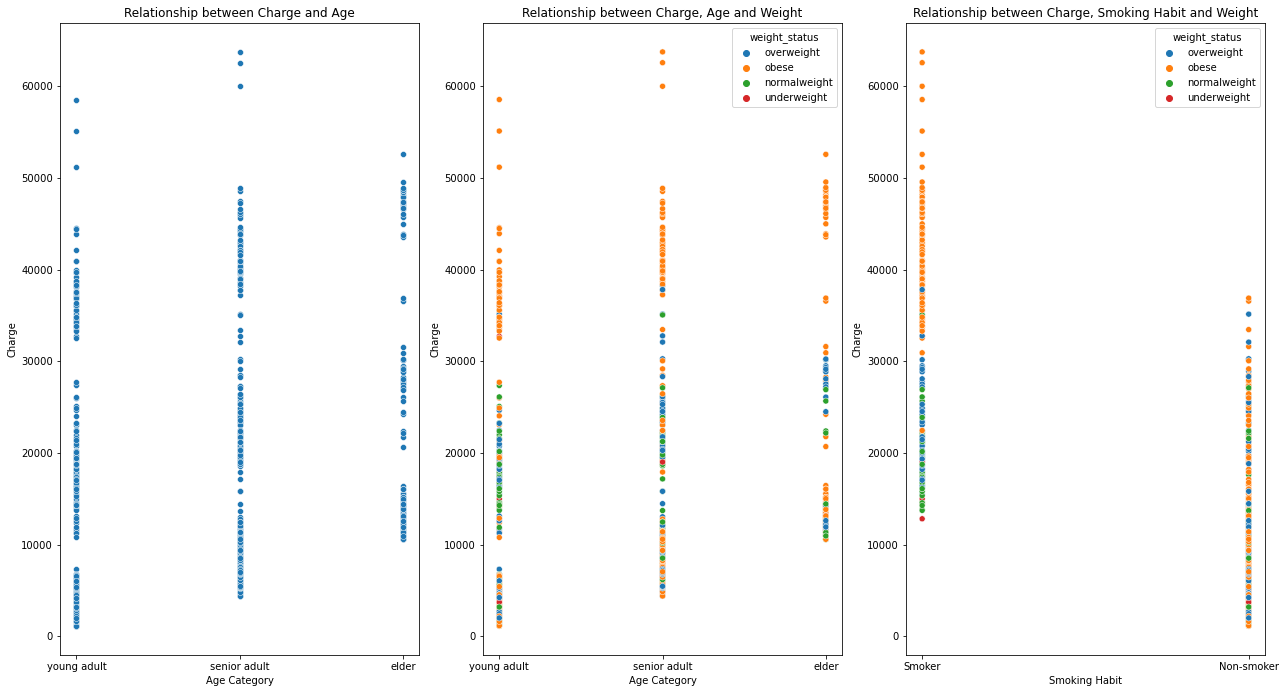

In [31]:
# multivariate analysis: relationship between charges, age, weight and smoking habit
plt.figure(figsize = [18, 28])

# subplot 1: charge vs age
plt.subplot(3, 3, 1)
sb.scatterplot(data=df, x='age_category', y='charges')
plt.title('Relationship between Charge and Age')
plt.xlabel('Age Category')
plt.ylabel('Charge')

# subplot 2: charge vs age, weight
plt.subplot(3, 3, 2)
sb.scatterplot(data=df, x='age_category', y='charges', hue='weight_status')
plt.title('Relationship between Charge, Age and Weight')
plt.xlabel('Age Category')
plt.ylabel('Charge')


# subplot 3: charge vs smoke, weight
plt.subplot(3, 3, 3)
sb.scatterplot(data=df, x='smoker', y='charges', hue='weight_status')
plt.title('Relationship between Charge, Smoking Habit and Weight')
plt.xticks(['yes', 'no'], ['Smoker', 'Non-smoker'])
plt.xlabel('Smoking Habit')
plt.ylabel('Charge')

plt.tight_layout()



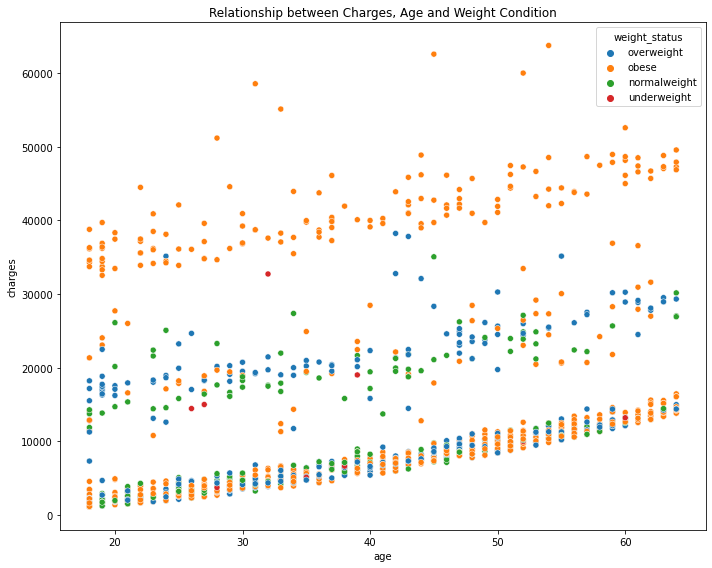

In [32]:
plt.figure(figsize = [10, 8])
sb.scatterplot(data=df, x='age', y='charges', hue='weight_status')
plt.title('Relationship between Charges, Age and Weight Condition')
plt.tight_layout()

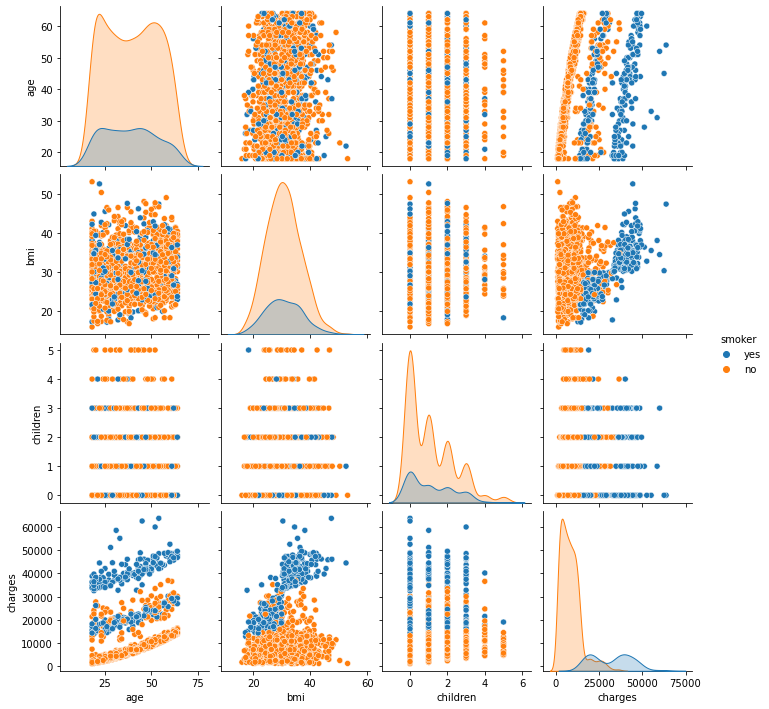

In [33]:
# Multivariate analysis
g = sb.pairplot(original_df, hue='smoker')

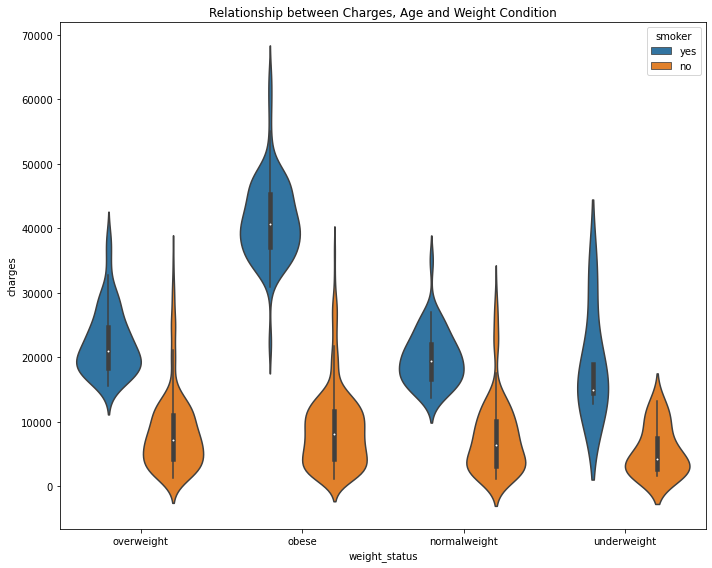

In [34]:
# violin plot of charges, age, weight and smoking habit
plt.figure(figsize = [10, 8])
sb.violinplot(data=df, x='weight_status', y='charges', hue='smoker')
plt.title('Relationship between Charges, Age and Weight Condition')
plt.tight_layout()

We can see from the above plot that smoking habit contributes to the increase in charges. Let's dive deep into the charge difference of smoker and non-smoker in obese group.

In [35]:
obese_smoker_charge = df.query('smoker == "yes" and weight_status == "obese"')['charges']

In [36]:
obese_nonsmoker_charge = df.query('smoker == "no" and weight_status == "obese"')['charges']

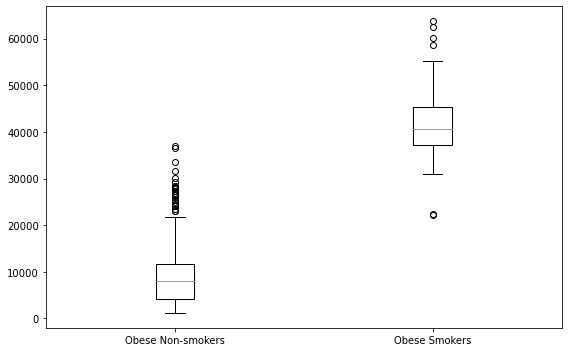

In [37]:
# charges of obese smokers and obese non-smokers
plt.figure(figsize = [8, 5])
plt.boxplot(x = [obese_nonsmoker_charge, obese_smoker_charge])
plt.xticks([1, 2], ['Obese Non-smokers', 'Obese Smokers'])
plt.tight_layout()

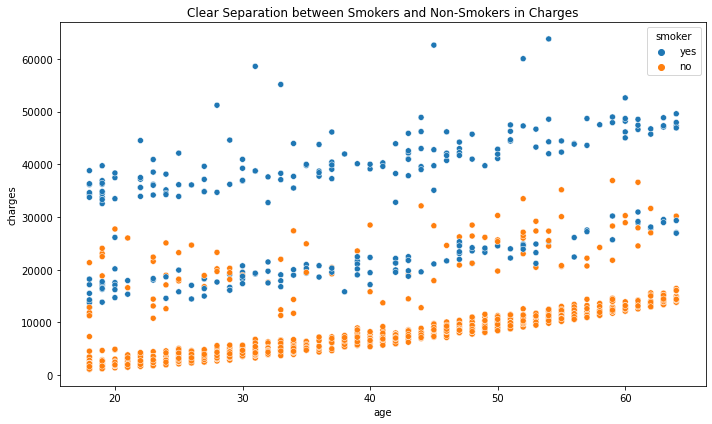

In [38]:
# charges of smokers and obese non-smokers across all ages
plt.figure(figsize = [10, 6])
sb.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Clear Separation between Smokers and Non-Smokers in Charges')
plt.tight_layout()

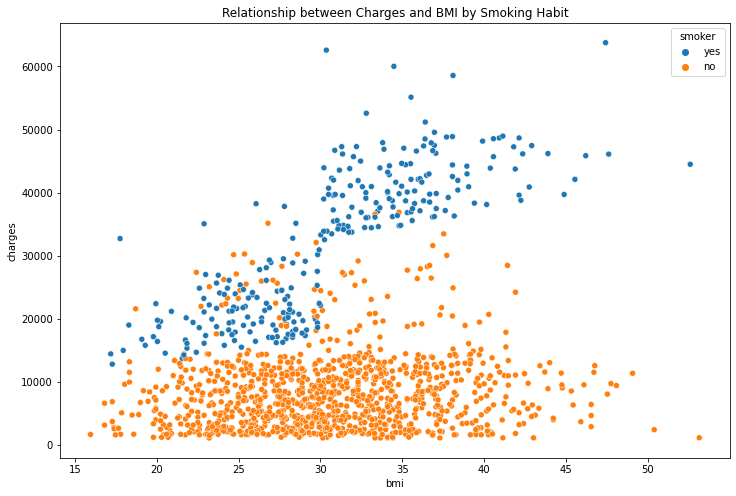

In [39]:
plt.figure(figsize = [12, 8])

sb.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Relationship between Charges and BMI by Smoking Habit');

We have done our exploratory data analysis. We will now use sklearn module to see if we could predict the charges with the existing variables.

In [40]:
# move clustering to after first prediction and training.

In [41]:
# !pip install yellowbrick

In [42]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)

In [43]:
# print(kmeans.cluster_centers_)

In [44]:
# print(kmeans.labels_)

In [45]:
# fig = plt.figure(figsize=(12,8))

# plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Accent")
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=100)
# plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
# plt.show()

In [48]:
# rename the column 'smoker', 'yes', 'no'. 'yes' and 'no' are derived from dummies of smokers
df1 = df1.rename(columns = {'smoker':'smoke', 'no':'non-smoker', 'yes':'smoker'})

In [ ]:
from sklearn.model_selection import train_test_split

In [134]:
# split the data set into train and test
X = df1[['age', 'male', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']]
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
# fit the linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [136]:
# compute the r-squared score of training data
reg.score(X_train, y_train)

0.742398009060026

In [137]:
# predict charges with testing data using linear model
y_pred = reg.predict(X_test)

In [138]:
# compute r-squared score, mean squared error of testing and predicted data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score = r2_score(y_test, y_pred)
print(score)
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7696118054369009
33780509.57479168
5812.100272258874


In [139]:
# to check if the model works by cross validation score
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg, X_train, y_train))

[0.76276797 0.80048429 0.63171109 0.68603936 0.75806544]


In [140]:
# to check the p-value of each variable
lm = sm.OLS(df1['charges'], df1[['age', 'male', 'bmi', 'children', 'smoker', 'northwest', 'southeast', 'southwest', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:09:32   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.000     233.514     280.199
male        -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
northwest   -352.9639    476.276     -0.741      0.459   -1287.298     581.370
southeast  -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
southwest   -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
intercept  -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Get the slope and intercept for trend line of bmi and age

m1, b1 = np.polyfit(df1['bmi'], df1['charges'], 1)
m2, b2 = np.polyfit(df1['age'], df1['charges'], 1)

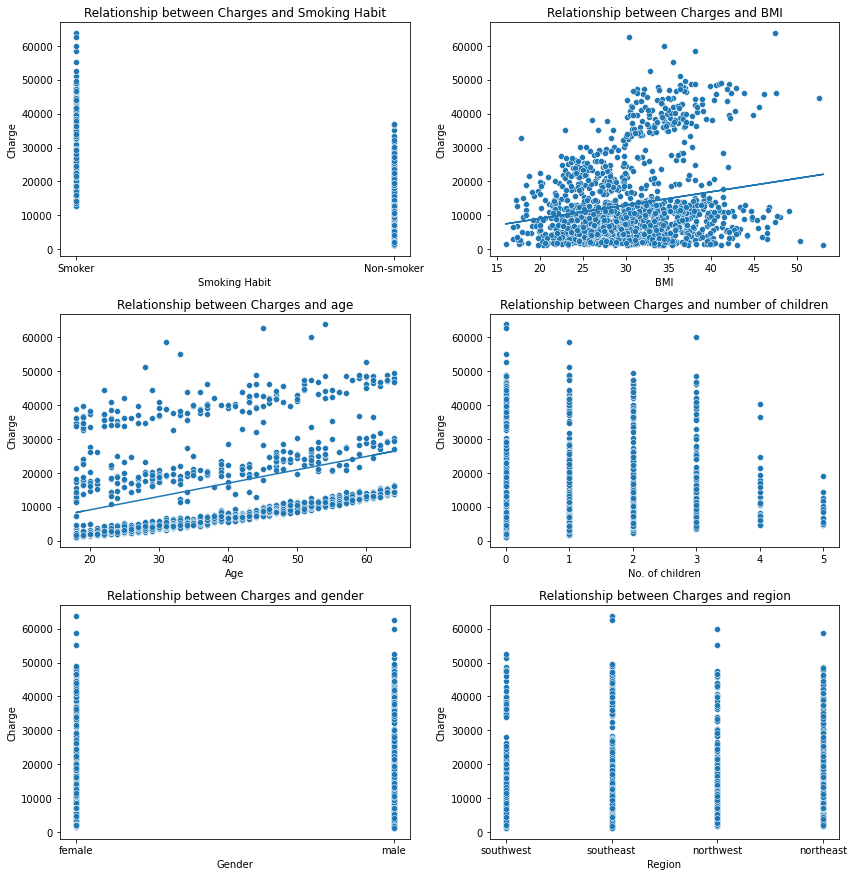

In [143]:
# fitted plot - charge vs most significant variables

plt.figure(figsize = [12, 24])

# subplot 1: charges vs smoking habit
plt.subplot(6, 2, 1)
sb.scatterplot(data=df1, x='smoke', y='charges')
plt.title('Relationship between Charges and Smoking Habit')
plt.xticks(['yes', 'no'], ['Smoker', 'Non-smoker'])
plt.ylabel('Charge')
plt.xlabel('Smoking Habit')

# subplot 2: charge vs bmi
plt.subplot(6, 2, 2)
sb.scatterplot(data=df1, x='bmi', y='charges')
plt.title('Relationship between Charges and BMI')
plt.plot(df1['bmi'], m1 * df1['bmi'] + b1)
plt.ylabel('Charge')
plt.xlabel('BMI')

# subplot 3: charge vs age
plt.subplot(6, 2, 3)
sb.scatterplot(data=df1, x='age', y='charges')
plt.title('Relationship between Charges and age')
plt.plot(df1['age'], m1 * df1['age'] + b1)
plt.ylabel('Charge')
plt.xlabel('Age')


# subplot 4: charge vs children
plt.subplot(6, 2, 4)
sb.scatterplot(data=df1, x='children', y='charges')
plt.title('Relationship between Charges and number of children')
plt.ylabel('Charge')
plt.xlabel('No. of children')

# subplot 5: charge vs gender
plt.subplot(6, 2, 5)
sb.scatterplot(data=df1, x='sex', y='charges')
plt.title('Relationship between Charges and gender')
plt.ylabel('Charge')
plt.xlabel('Gender')

# subplot 6: charge vs location
plt.subplot(6, 2, 6)
sb.scatterplot(data=df1, x='region', y='charges')
plt.title('Relationship between Charges and region')
plt.ylabel('Charge')
plt.xlabel('Region')

plt.tight_layout()

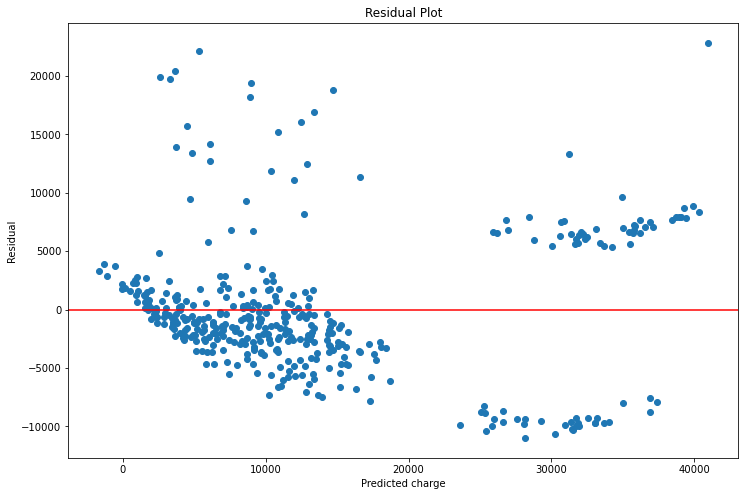

In [144]:
# residual plot - error vs predicted value
plt.figure(figsize = [12, 8])
plt.scatter(x=y_pred, y=(y_test - y_pred))
plt.axhline(y=0, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted charge')
plt.ylabel('Residual');

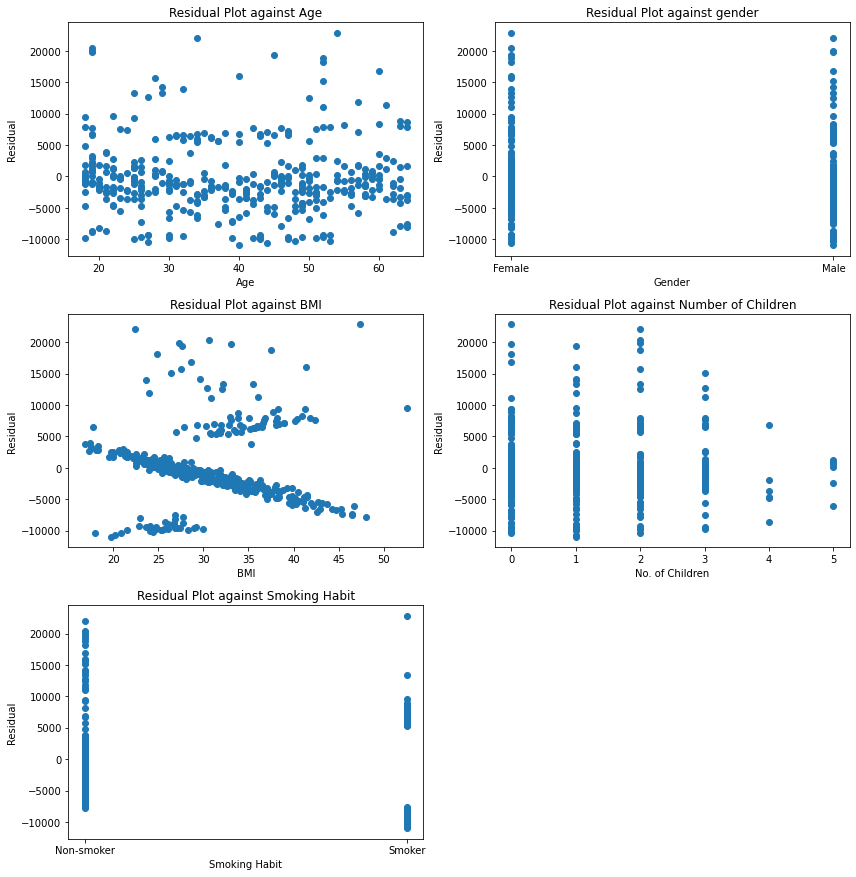

In [145]:
# residual plot against each variable
plt.figure(figsize = [12, 24])

# subplot 1: residual vs age
plt.subplot(6, 2, 1)
plt.scatter(x=X_test['age'], y=(y_test - y_pred))
plt.title('Residual Plot against Age')
plt.xlabel('Age')
plt.ylabel('Residual')

# subplot 2: residual vs gender
plt.subplot(6, 2, 2)
plt.scatter(x=X_test['male'], y=(y_test - y_pred))
plt.title('Residual Plot against gender')
plt.xlabel('Gender')
plt.ylabel('Residual')
plt.xticks([0, 1], ['Female', 'Male'])


# subplot 3: residual vs bmi
plt.subplot(6, 2, 3)
plt.scatter(x=X_test['bmi'], y=(y_test - y_pred))
plt.title('Residual Plot against BMI')
plt.xlabel('BMI')
plt.ylabel('Residual')


# subplot 4: residual vs no of children
plt.subplot(6, 2, 4)
plt.scatter(x=X_test['children'], y=(y_test - y_pred))
plt.title('Residual Plot against Number of Children')
plt.xlabel('No. of Children')
plt.ylabel('Residual')

# subplot 5: residual vs smoking habit
plt.subplot(6, 2, 5)
plt.scatter(x=X_test['smoker'], y=(y_test - y_pred))
plt.title('Residual Plot against Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Residual')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])

plt.tight_layout()

The r-squared score still has room for improvement. Let's see if clustering would help improve the prediction accuracy of the model.

I would also try to group the region into 'south' and 'north' to reduce the variables, and see if it improves the accuracy.

In [100]:
# these are the variables for clustering
features = df1[['age', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']]

In [101]:
# KMeans clustering to predict the closest cluster each sample in features belongs to
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(features)

df1['patient_type'] = kmeans.predict(features)

In [102]:
print(kmeans.cluster_centers_)

[[51.47305389 31.32080838  1.1257485   0.19610778  0.24401198  0.23952096
   0.27245509  0.24401198]
 [26.97761194 30.00794776  1.0641791   0.21343284  0.24029851  0.24626866
   0.27164179  0.24179104]]


In [103]:
print(kmeans.labels_)

[1 1 1 ... 1 1 0]


In [78]:
# group southeast and southwest into south
df1['south'] = df1.apply(lambda x: 1 if (x['southeast'] == 1 or x['southwest'] == 1) else 0, axis = 1)

In [79]:
# group northeast and northwest into north
df1['north'] = df1.apply(lambda x: 1 if x['south'] == 0 else 0, axis = 1)

In [171]:
# re-run the linear model.
# split the dataset into test and train with the same random state
X = df1[['age', 'male', 'bmi', 'children', 'smoker', 'south', 'north', 'patient_type']]
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
# fit the linear model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [173]:
# compute the r-squared score of training data
reg.score(X_train, y_train)

0.7421942419439816

In [174]:
# predict charges with testing data using linear model
y_pred = reg.predict(X_test)

In [175]:
# compute r-squared score, mean squared error of testing and predicted data
score = r2_score(y_test, y_pred)
print(score)
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7697957060581131
33753545.27348513
5809.780139857715


In [176]:
# to check if the model works by cross validation score
print(cross_val_score(reg, X_train, y_train))

[0.76232587 0.80238347 0.63106514 0.68766695 0.75609955]


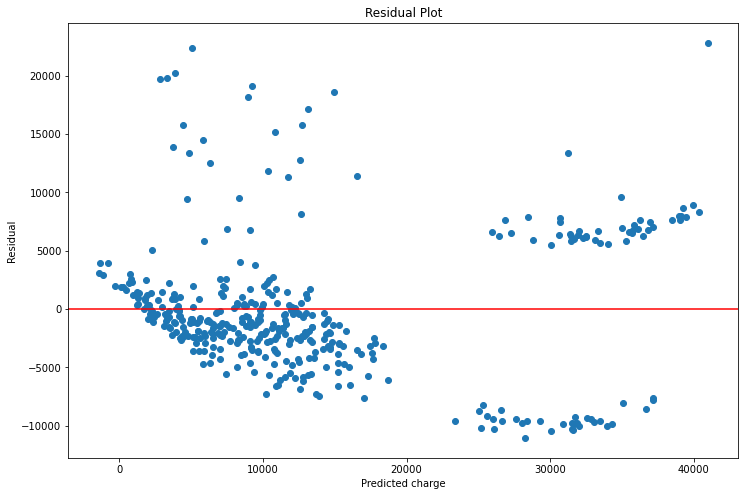

In [177]:
# residual plot - error vs predicted value
plt.figure(figsize = [12, 8])
plt.scatter(x=y_pred, y=(y_test - y_pred))
plt.axhline(y=0, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted charge')
plt.ylabel('Residual');

In [179]:
lm = sm.OLS(df1['charges'], df1[['male', 'bmi', 'children', 'smoker', 'south', 'patient_type']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              1575.
Date:                Wed, 18 May 2022   Prob (F-statistic):                        0.00
Time:                        15:28:53   Log-Likelihood:                         -13606.
No. Observations:                1338   AIC:                                  2.722e+04
Df Residuals:                    1332   BIC:                                  2.726e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
male          -166.9947    344.589     -0.485      0.628    -842.991     509.001
bmi            370.9534     11.993     30.930      0.000     347.426     394.481
children       552.4088    141.824      3.895      0.000     274.185     830.632
smoker        2.382e+04    429.026     55.533      0.000     2.3e+04    2.47e+04
south         -892.4035    356.085     -2.506      0.012   -1590.952    -193.855
patient_type -6129.2951    334.077    -18.347      0.000   -6784.670   -5473.920
==============================================================================
Omnibus:                      238.738   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.478
Skew:                           1.042   Prob(JB):                    2.81e-105
Kurtosis:                       5.073   Cond. No.                         78.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared value didn't improve much. The KMeans clustering didn't help much in improving the prediction accuracy.

We will look for more methods to improve the prediction accuracy in the future.

### Conclusion

Smoking habit is the main variable that affects the insurance charges. 

BMI/Weight condition is the second variable that affects the insurance charges. However, even an obese non-smoker is charged much less compared with an obese smoker.

According to the linear regression model, variables like number of children and region do not have any significant impact in the insurance charges. But they could be useful for training our prediction model.

According to our second prediction model, it seems that clustering might not help in improving the prediction accuracy.

In [ ]:
import pandas as pd
import numpy as np

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sb
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

# read the dataset
df = pd.read_csv('insurance.csv')

df.head()

df.isnull().sum()

original_df = df.copy()

df['charges'].describe()

There is no null rows in the dataset. I will now carry out exploratory data analysis.

bins = np.arange(0, 64000, 1000)
plt.hist(data = df, x = 'charges', bins = bins);

np.log10(df['charges'].describe())

# from the above plot, we can see that charge is a right skewed distribution. Plot on logarithmic scale can normalise
# the data

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['charges'].max()) + log_binsize, log_binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'charges', bins = bins)
plt.xscale('log')
plt.xticks([1000, 1300, 2000, 4000, 10000, 30000, 60000], [1000, 1300, 2000, 4000, 10000, 30000, 60000])
plt.xlabel('Charges')
plt.xlim(1000,70000)
plt.show()

# to categorise age groups
df['age_category'] = df.apply(lambda x: 'young adult' if x['age'] <= 35 else 
                              ('senior adult' if x['age'] <= 55 else 'elder'), axis = 1)

# to create dummies for categorical variables, so we can analyse with different modules later
sex_dummies = pd.get_dummies(df['sex'])
smoker_dummies = pd.get_dummies(df['smoker'])
region_dummies = pd.get_dummies(df['region'])
age_category_dummies = pd.get_dummies(df['age_category'])
df1 = df.join(sex_dummies).join(smoker_dummies).join(region_dummies).join(age_category_dummies)

# to categorise weight groups
df['weight_status'] = df.apply(lambda x: 'underweight' if x['bmi'] <= 18.5 else 
                              ('normalweight' if x['bmi'] <= 24.9 else 
                              ('overweight' if x['bmi'] <= 29.9 else 'obese')), axis = 1)

# Distribution of age group.
age_category = df['age_category'].value_counts()
plt.pie(age_category, labels = age_category.index, autopct='%.2f')
plt.title('Distribution of Age ')
plt.axis('square');

df['bmi'].describe()

binsize = 1
bins = np.arange(15, 55, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'bmi', bins = bins)
plt.xscale('log')
plt.xticks([15, 20, 25, 30, 35, 40, 45, 50, 55], [15, 20, 25, 30, 35, 40, 45, 50, 55])
plt.xlabel('BMI')
plt.title('Distribution of BMI');

plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'age', y = 'bmi')
# plt.xlim([0, 5])
# plt.ylim([0, 100])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relationship between Age and BMI');

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[['charges','children','bmi','age']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot')
plt.show()

Let's look into the relationship between age and bmi

# box plot
ax = sb.boxplot(x = 'age_category', y ='bmi', data = df)
plt.title('Relationship between Age and BMI');

# regression model to see how age affects bmi

df['intercept'] = 1

lm = sm.OLS(df['bmi'], df[['intercept', 'age']])

results = lm.fit()
results.summary()

With the p-value much lower than 0.05, it shows that age does have an impact on bmi with statistical evidence.

df.head()

# regression model of bmi and age category, using senior adult as base
df1['intercept'] = 1
lm = sm.OLS(df1['bmi'], df1[['intercept', 'young adult', 'elder']])
results = lm.fit()
results.summary()

With the p-value of young adult slightly above 0.05, and elder much lower than 0.05, it shows that age might not have a huge impact from 18 - 35 years old, but does have an impact for 55 years old or above.

# box plot of relationship between bmi, smoking habit and age category
ax = sb.boxplot(x='age_category', y='bmi', hue='smoker', data=df)
plt.tight_layout()

# plt.legend(loc='upper right', labels=['Smoker', 'Non-smoker'])

mean_charge_young_adult = df.query('age_category == "young adult"')['charges'].mean()
print('mean charge of young adult: ', mean_charge_young_adult)

mean_charge_senior_adult = df.query('age_category == "senior adult"')['charges'].mean()
print('mean charge of senior adult: ', mean_charge_senior_adult)

mean_charge_elder = df.query('age_category == "elder"')['charges'].mean()
print('mean charge of elder: ', mean_charge_elder)

median_charge_young_adult = df.query('age_category == "young adult"')['charges'].median()
print('median charge of young adult: ', median_charge_young_adult)

median_charge_senior_adult = df.query('age_category == "senior adult"')['charges'].median()
print('median charge of senior adult: ', median_charge_senior_adult)

median_charge_elder = df.query('age_category == "elder"')['charges'].median()
print('median charge of elder: ', median_charge_elder)

# dive into the relationship between age category and charges
y1 = [mean_charge_young_adult, mean_charge_senior_adult, mean_charge_elder]
y2 = [median_charge_young_adult, median_charge_senior_adult, median_charge_elder]
x = ['young adult', 'senior adult', 'elder']

plt.figure(figsize = [12, 8])

plt.subplot(2, 2, 1)
plt.bar(x, y1)
plt.xlabel('age group')
plt.ylabel('average charge')
plt.title('Average Charge for each age group')

plt.subplot(2, 2, 2)
plt.bar(x, y2)
plt.xlabel('age group')
plt.ylabel('median charge')
plt.title('Median Charge for each age group');

# multivariate analysis: relationship between charges, age, weight and smoking habit
plt.figure(figsize = [18, 28])

# subplot 1: charge vs age
plt.subplot(3, 3, 1)
sb.scatterplot(data=df, x='age_category', y='charges')
plt.title('Relationship between Charge and Age')
plt.xlabel('Age Category')
plt.ylabel('Charge')

# subplot 2: charge vs age, weight
plt.subplot(3, 3, 2)
sb.scatterplot(data=df, x='age_category', y='charges', hue='weight_status')
plt.title('Relationship between Charge, Age and Weight')
plt.xlabel('Age Category')
plt.ylabel('Charge')


# subplot 3: charge vs smoke, weight
plt.subplot(3, 3, 3)
sb.scatterplot(data=df, x='smoker', y='charges', hue='weight_status')
plt.title('Relationship between Charge, Smoking Habit and Weight')
plt.xticks(['yes', 'no'], ['Smoker', 'Non-smoker'])
plt.xlabel('Smoking Habit')
plt.ylabel('Charge')

plt.tight_layout()



plt.figure(figsize = [10, 8])
sb.scatterplot(data=df, x='age', y='charges', hue='weight_status')
plt.title('Relationship between Charges, Age and Weight Condition')
plt.tight_layout()

# Multivariate analysis
g = sb.pairplot(original_df, hue='smoker')

# violin plot of charges, age, weight and smoking habit
plt.figure(figsize = [10, 8])
sb.violinplot(data=df, x='weight_status', y='charges', hue='smoker')
plt.title('Relationship between Charges, Age and Weight Condition')
plt.tight_layout()

We can see from the above plot that smoking habit contributes to the increase in charges. Let's dive deep into the charge difference of smoker and non-smoker in obese group.

obese_smoker_charge = df.query('smoker == "yes" and weight_status == "obese"')['charges']

obese_nonsmoker_charge = df.query('smoker == "no" and weight_status == "obese"')['charges']

# charges of obese smokers and obese non-smokers
plt.figure(figsize = [8, 5])
plt.boxplot(x = [obese_nonsmoker_charge, obese_smoker_charge])
plt.xticks([1, 2], ['Obese Non-smokers', 'Obese Smokers'])
plt.tight_layout()

# charges of smokers and obese non-smokers across all ages
plt.figure(figsize = [10, 6])
sb.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Clear Separation between Smokers and Non-Smokers in Charges')
plt.tight_layout()

plt.figure(figsize = [12, 8])

sb.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Relationship between Charges and BMI by Smoking Habit');

We have done our exploratory data analysis. We will now use sklearn module to see if we could predict the charges with the existing variables.

# move clustering to after first prediction and training.



# !pip install yellowbrick

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)

# print(kmeans.cluster_centers_)

# print(kmeans.labels_)

# fig = plt.figure(figsize=(12,8))

# plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Accent")
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=100)
# plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
# plt.show()





# rename the column 'smoker', 'yes', 'no'. 'yes' and 'no' are derived from dummies of smokers
df1 = df1.rename(columns = {'smoker':'smoke', 'no':'non-smoker', 'yes':'smoker'})

from sklearn.model_selection import train_test_split

# split the data set into train and test
X = df1[['age', 'male', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']]
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# compute the r-squared score of training data
reg.score(X_train, y_train)

# predict charges with testing data using linear model
y_pred = reg.predict(X_test)

# compute r-squared score, mean squared error of testing and predicted data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score = r2_score(y_test, y_pred)
print(score)
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# to check if the model works by cross validation score
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg, X_train, y_train))

# to check the p-value of each variable
lm = sm.OLS(df1['charges'], df1[['age', 'male', 'bmi', 'children', 'smoker', 'northwest', 'southeast', 'southwest', 'intercept']])
results = lm.fit()
results.summary()

# Get the slope and intercept for trend line of bmi and age

m1, b1 = np.polyfit(df1['bmi'], df1['charges'], 1)
m2, b2 = np.polyfit(df1['age'], df1['charges'], 1)

# fitted plot - charge vs most significant variables

plt.figure(figsize = [12, 24])

# subplot 1: charges vs smoking habit
plt.subplot(6, 2, 1)
sb.scatterplot(data=df1, x='smoke', y='charges')
plt.title('Relationship between Charges and Smoking Habit')
plt.xticks(['yes', 'no'], ['Smoker', 'Non-smoker'])
plt.ylabel('Charge')
plt.xlabel('Smoking Habit')

# subplot 2: charge vs bmi
plt.subplot(6, 2, 2)
sb.scatterplot(data=df1, x='bmi', y='charges')
plt.title('Relationship between Charges and BMI')
plt.plot(df1['bmi'], m1 * df1['bmi'] + b1)
plt.ylabel('Charge')
plt.xlabel('BMI')

# subplot 3: charge vs age
plt.subplot(6, 2, 3)
sb.scatterplot(data=df1, x='age', y='charges')
plt.title('Relationship between Charges and age')
plt.plot(df1['age'], m1 * df1['age'] + b1)
plt.ylabel('Charge')
plt.xlabel('Age')


# subplot 4: charge vs children
plt.subplot(6, 2, 4)
sb.scatterplot(data=df1, x='children', y='charges')
plt.title('Relationship between Charges and number of children')
plt.ylabel('Charge')
plt.xlabel('No. of children')

# subplot 5: charge vs gender
plt.subplot(6, 2, 5)
sb.scatterplot(data=df1, x='sex', y='charges')
plt.title('Relationship between Charges and gender')
plt.ylabel('Charge')
plt.xlabel('Gender')

# subplot 6: charge vs location
plt.subplot(6, 2, 6)
sb.scatterplot(data=df1, x='region', y='charges')
plt.title('Relationship between Charges and region')
plt.ylabel('Charge')
plt.xlabel('Region')

plt.tight_layout()

# residual plot - error vs predicted value
plt.figure(figsize = [12, 8])
plt.scatter(x=y_pred, y=(y_test - y_pred))
plt.axhline(y=0, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted charge')
plt.ylabel('Residual');

# residual plot against each variable
plt.figure(figsize = [12, 24])

# subplot 1: residual vs age
plt.subplot(6, 2, 1)
plt.scatter(x=X_test['age'], y=(y_test - y_pred))
plt.title('Residual Plot against Age')
plt.xlabel('Age')
plt.ylabel('Residual')

# subplot 2: residual vs gender
plt.subplot(6, 2, 2)
plt.scatter(x=X_test['male'], y=(y_test - y_pred))
plt.title('Residual Plot against gender')
plt.xlabel('Gender')
plt.ylabel('Residual')
plt.xticks([0, 1], ['Female', 'Male'])


# subplot 3: residual vs bmi
plt.subplot(6, 2, 3)
plt.scatter(x=X_test['bmi'], y=(y_test - y_pred))
plt.title('Residual Plot against BMI')
plt.xlabel('BMI')
plt.ylabel('Residual')


# subplot 4: residual vs no of children
plt.subplot(6, 2, 4)
plt.scatter(x=X_test['children'], y=(y_test - y_pred))
plt.title('Residual Plot against Number of Children')
plt.xlabel('No. of Children')
plt.ylabel('Residual')

# subplot 5: residual vs smoking habit
plt.subplot(6, 2, 5)
plt.scatter(x=X_test['smoker'], y=(y_test - y_pred))
plt.title('Residual Plot against Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Residual')
plt.xticks([0, 1], ['Non-smoker', 'Smoker'])

plt.tight_layout()

The r-squared score still has room for improvement. Let's see if clustering would help improve the prediction accuracy of the model.

I would also try to group the region into 'south' and 'north' to reduce the variables, and see if it improves the accuracy.

# these are the variables for clustering
features = df1[['age', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']]

# KMeans clustering to predict the closest cluster each sample in features belongs to
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(features)

df1['patient_type'] = kmeans.predict(features)

print(kmeans.cluster_centers_)

print(kmeans.labels_)

# group southeast and southwest into south
df1['south'] = df1.apply(lambda x: 1 if (x['southeast'] == 1 or x['southwest'] == 1) else 0, axis = 1)

# group northeast and northwest into north
df1['north'] = df1.apply(lambda x: 1 if x['south'] == 0 else 0, axis = 1)



# re-run the linear model.
# split the dataset into test and train with the same random state
X = df1[['age', 'male', 'bmi', 'children', 'smoker', 'south', 'north', 'patient_type']]
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the linear model
reg = LinearRegression()
reg.fit(X_train, y_train)

# compute the r-squared score of training data
reg.score(X_train, y_train)

# predict charges with testing data using linear model
y_pred = reg.predict(X_test)

# compute r-squared score, mean squared error of testing and predicted data
score = r2_score(y_test, y_pred)
print(score)
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# to check if the model works by cross validation score
print(cross_val_score(reg, X_train, y_train))

# residual plot - error vs predicted value
plt.figure(figsize = [12, 8])
plt.scatter(x=y_pred, y=(y_test - y_pred))
plt.axhline(y=0, color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted charge')
plt.ylabel('Residual');

lm = sm.OLS(df1['charges'], df1[['male', 'bmi', 'children', 'smoker', 'south', 'patient_type']])
results = lm.fit()
results.summary()

We can see that the R-squared value didn't improve much. The KMeans clustering didn't help much in improving the prediction accuracy.

We will look for more methods to improve the prediction accuracy in the future.

### Conclusion

Smoking habit is the main variable that affects the insurance charges. 

BMI/Weight condition is the second variable that affects the insurance charges. However, even an obese non-smoker is charged much less compared with an obese smoker.

According to the linear regression model, variables like number of children and region do not have any significant impact in the insurance charges. But they could be useful for training our prediction model.

According to our second prediction model, it seems that clustering might not help in improving the prediction accuracy.